<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/GymFrozenLakeQLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
## Appliqué à [Gym.OpenAI](https://gym.openai.com)

---
## Test de ML par Q-Learning pour atteindre l'objectif

**Utilisation de l'environnement Gym**
 (voir la page d'introduction à [Gym](https://gym.openai.com)).

#### Si besoin, importer gym

In [1]:
#!pip install gym

----
#### L'environnement FrozenLake

In [2]:
import gym

---
- Utiliser l'environnement `CliffWalking` (un grille où il faut le plus court chemin vers l'arrivée)
- Chaque action coûte 1 point, l'arrivée n'en rapporte pas.
- On peut, 
    - pour accélerer la résolution décider de récompenser l'agent de quelques points s'il parvient au but.
    - ou, *de préférence*, changer la fonction   qlearn pour qu'elle retourne 
        - total_r : recompense totale; 
        - r : recompense du dernier etat rencontre
        - states_list : liste des etats traverses
        - actions_list : liste des actions effectuees
        - goal : but atteint


---
#### Etude de l'environnement

In [3]:
env = gym.make('CliffWalking-v0') # tester FrozenLake8x8 pour l'environnement plus large
print("specification de l'environnement : ", env.spec)
print("espace d'actions : ", env.action_space ) #ici 4 actions discrétisée
print("espace d'etats : ", env.observation_space) #ici 48 cellules possibles

x = env.reset()
print("Environnement et etat initial (en rouge) : ")
env.render()
print("X = Start (",x,"), T = Goal (47) , C = obstacle")
print()
print("Prendre une action au hasard.. ")
a = env.action_space.sample()
print("action choisie=",a,"; l'exécuter...")
#on recupère des valeurs en retour
new_s, reward, done, info = env.step(a)
print(f"nouvel état={new_s}, recompense sur cet etat={reward}, etat final (but)={done}, info={info}")
#note sous python 3.10, la version de gym retourne 5 valeurs : 
#new_s, reward, done, goal, info = env.step(a)
#print(f"nouvel état={new_s}, recompense sur cet etat={reward}, etat final (but)={done},etat but={goal}, info={info}")

env.render()


specification de l'environnement :  EnvSpec(CliffWalking-v0)
espace d'actions :  Discrete(4)
espace d'etats :  Discrete(48)
Environnement et etat initial (en rouge) : 
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

X = Start ( 36 ), T = Goal (47) , C = obstacle

Prendre une action au hasard.. 
action choisie= 0 ; l'exécuter...
nouvel état=24, recompense sur cet etat=-1, etat final (but)=False, info={'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



---
#### Test des actions

Sous Gym, `step` permet d'effectuer une action. 
En retour la fonction retourne une observation sur l'etat d'arrivee, sa recompense, son type (final ou non), et des informations.
Ici, dans FrozenLake, 
- observation = position où se trouve l'agent
- reward = recompense
- done = vrai si but atteint
- info = probabilité de succès de l'action 

---
### <font color="red">Résolution</font>
Ci-dessous la solution qui semble idéale.

In [4]:
env = gym.make('CliffWalking-v0')
#solution = politique = suite d'actions menant à un but
actions = [0,1,1,1,1,1,1,1,1,1,1,1,2]
env.reset()
for a in actions:
    observation, reward, done, info = env.step(a)
    env.render()
    print("pos° actuelle:", observation,",gain:", reward,",fini:", done,",", info)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

pos° actuelle: 24 ,gain: -1 ,fini: False , {'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

pos° actuelle: 25 ,gain: -1 ,fini: False , {'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

pos° actuelle: 26 ,gain: -1 ,fini: False , {'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

pos° actuelle: 27 ,gain: -1 ,fini: False , {'prob': 1.0}
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

pos° actuelle: 28 ,gain: -1 ,fini: False , {'prob': 1.0}
o  o  o  o

---
## Exemple d'algorithme

In [5]:
import numpy as np
import random as rnd

env = gym.make('CliffWalking-v0')
actions = {0:'Haut', 1:'Droite', 2:'Bas', 3:'Gauche'}



In [6]:
# initialiser la Q-Table
# autant de cases que l'environnement en possède, 
# contenant autant de valeurs que d'actions possibles
# donc ici une matrice 64 x 4
QA = np.zeros([env.observation_space.n,env.action_space.n])
QB = np.zeros([env.observation_space.n,env.action_space.n])

### Mise en place des paramètres
Pour rappel l'algo de Q Learning simple repose sur cette équation : 
$Q(s,a) \gets \lambda \times (r + \gamma \times max_{a'}(Q(s', a'))) + (1-\lambda ) \times Q(s,a)$ avec 
  - $\lambda$ : coef d'apprentissage
  - $\gamma$ : coef de réduction 
  - $r$ : récompense
  
Cette équation donne la qualité de l'action *a* à partir de l'état *s*.

Initialement, les actions sont choisies aléatoirement et notées; puis au fil des tests les actions les plus valuées sont choisies. Pour cela, un tirage est effectuée, s'il est inférieur à un $\epsilon$, le choix est aléatoire. Cet $\epsilon$ décroit au fil des tests.

In [19]:
lambda_learn = .2
gamma = 0.99
epsilon = 1.

#### Récupérer la meilleure action
`argmax(tab)` retourne l'indice de la plus grande valeur du tableau.

`argmax(Q[2])` retourne donc le no de l'action la plus intéressante à partir de l'état 2.

## L'algorithme de Q-Learning simple

In [20]:
np.max(QA[0, :])

-0.9090909090909092

In [21]:
##algorithme de Q-Learning simple
def q_learn(nb_actions=64):
    """
    effectue un cycle d'apprentissage/recherche de solution' via le Q-Learning simple

    Parameters
    ----------
    epoch : no de l'etape

    Returns
    -------
    total_r : recompense totale
    r : recompense du dernier etat rencontre
    states_list : liste des etats traverses
    actions_list : liste des actions effectuees
    goal : but atteint

    """
    s = env.reset()
    #sous python 3.10, ajouter
    #s = s[0]
    total_r = 0
    done = False
    step = 0
    states_list = []
    actions_list = []
    # The Q-Table learning algorithm
    while not done and step < nb_actions:
        step += 1
        # Choose an action by greedily (with noise) picking from Q table        
        if rnd.random()<epsilon or (np.max(QA[s, :])==0 and np.max(QB[s, :])==0):
            a = env.action_space.sample()
        else:
            actions = QA[s, :]
            aa = np.argmax(actions)
            actions = QB[s, :]
            ab = np.argmax(actions)
            a = aa if QA[s,aa]>QB[s,ab] else ab

        # Get new state and reward from environment
        new_state, r, done, _ = env.step(a)

        # DoubleQ-Learning
        if(rnd.randint(0,1)==0):            
            best_next_a = np.argmax(QA[new_state, :])
            QA[s, a] = (1-lambda_learn)*QA[s, a] + lambda_learn*(r + gamma * QB[new_state, best_next_a] - QA[s, a])
        else:
            best_next_b = np.argmax(QB[new_state, :])
            QB[s, a] = (1-lambda_learn)*QB[s, a] + lambda_learn*(r + gamma * QA[new_state, best_next_b] - QB[s, a])

            # Get negative reward every step
        # if r == 0: r = -0.001

        # Q-Learning
#        Q[s, a] = (1-lambda_learn)*Q[s, a] + lambda_learn*(r + gamma * np.max(Q[new_state, :]) - Q[s, a])
        s = new_state
        total_r = total_r + r
        states_list.append(s)
        actions_list.append(a)
    return total_r, r, states_list, actions_list, done

In [22]:
def try_qlearn(nb_episodes = 4000, nb_actions = 64):
    """
    lance nb_episodes fois un cycle de Q-Learning et memorise chaque solution trouvee

    Returns
    -------
    solutions_list : liste des solutions (no, recompense totale, liste des etats, liste des actions)
    """
    global epsilon
    states_list = []
    actions_list = []
    solutions_list = []
    epsilon = 1
    for i in range(nb_episodes):
        # Reset environment and get first new observation
        total_r, r, states_list, actions_list, done = q_learn()
        epsilon = epsilon * 0.999
        # memorize if a solution has been found
        if done: solutions_list.append((i, total_r, states_list, actions_list))
        
    if(len(solutions_list) == 0): print("aucune solution trouvee !!")
    return solutions_list

## Affichage de du résultat
Affichons maintenant la liste des actions via l'environnement Gym

In [23]:
def rendu(solutions_list):
    """ affiche la plus courte sequence d'actions permettant d'atteindre l'objectif q partir des solutions fournies
    Parameters
    ----------
    solutions_list : liste des solutions trouvees

    Returns
    -------
    None.
    """
    mini_sol = solutions_list[0]
    for s in  solutions_list:
        if len(s[2]) < len(mini_sol[2]): mini_sol = s
    print("une solution en ", len(mini_sol[2]), " etapes : ")
    env.reset()
    env.render()
    for i in range(0, len(mini_sol[2])):
        env.env.s = mini_sol[2][i]
        print("action ", actions[mini_sol[3][i]])
        env.render()

In [24]:
##ON LANCE LA RESOLUTION : 
solutions = try_qlearn(15000, 50)
if(len(solutions)>0):rendu(solutions)
#relancer le bloc si pas de solution trouvee

une solution en  13  etapes : 
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

action  Haut
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

action  Droite
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  x  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

action  Droite
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  x  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

action  Droite
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  x  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

action  Droite
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  x  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

action  Droite
o  o  o  o  o  o  o  o  o  o  o  o


In [25]:
import matplotlib.pyplot as plt
def plot_frequence_sol(solutions_list):
    """
    dessine la frequence de solution trouvees
    Parameters
    ----------
    solutions : liste des solutions

    Returns
    -------
    None.

    """
    xs = [x[0] for x in solutions_list]
    ys = [y[1] for y in solutions_list]
    plt.figure(figsize=(10, 4))
    plt.plot(xs, ys, '.')
    plt.show()



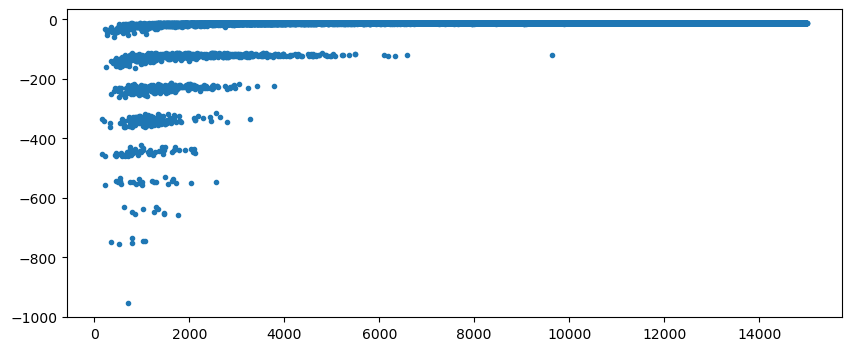

In [26]:
plot_frequence_sol(solutions)

Plus on relance les tests, plus la chance de trouver une solution peu coûteuse apparaît...